In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/abutalha/Documents/Data Analyst/AI Quest/Data Science/mall-customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1, inplace=True)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [7]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
from pandas_profiling import ProfileReport

In [9]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

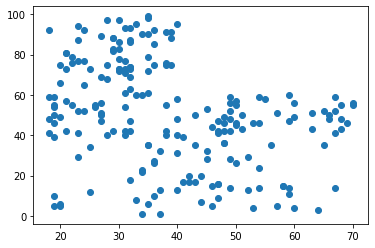

In [10]:
plt.scatter(df.age, df.score)

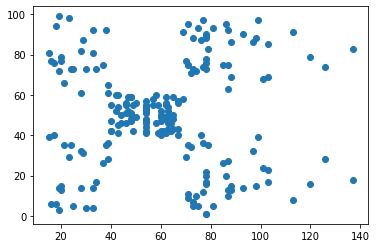

In [11]:
plt.scatter(df.income, df.score)

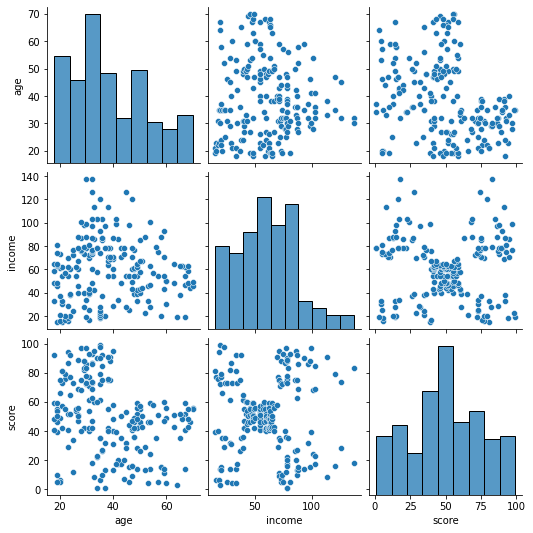

In [12]:
sns.pairplot(df)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
df.gender = le.fit_transform(df['gender'])

In [16]:
df.head()

,gender,age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(df, test_size=.20, random_state=1)

In [19]:
train.head()

,gender,age,income,score
108,1,68,63,43
107,1,54,63,46
189,0,36,103,85
14,1,37,20,13
56,0,51,44,50


In [20]:
test.head()

,gender,age,income,score
58,0,27,46,51
40,0,65,38,35
34,0,49,33,14
102,1,67,62,59
184,0,41,99,39


In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss = []

clusters = range(1,16)

for k in clusters:
    kmn = KMeans(n_clusters=k)
    kmn.fit(train)
    wcss.append(kmn.inertia_)

In [23]:
wcss

[243103.75625,
 164000.44405760407,
 115266.5916647498,
 83831.83668817996,
 59277.39007724301,
 44971.13441711367,
 38254.05114070634,
 34148.25680008846,
 31304.504399795478,
 28749.895863499245,
 26322.931259315395,
 23798.256425159805,
 22849.15542929293,
 20627.909897047397,
 18945.991101591644]

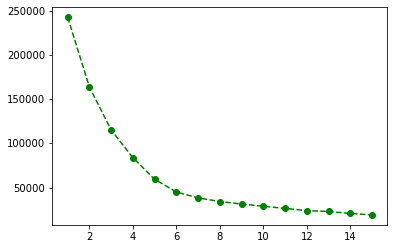

In [24]:
plt.plot(clusters, wcss, 'go--', color='green')

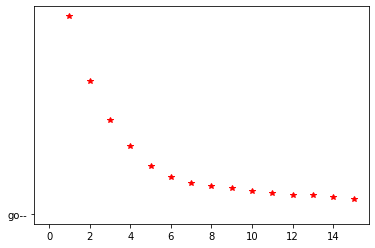

In [25]:
plt.plot(clusters, wcss, 'r*','go--', color='red')

In [26]:
!pip install --upgrade kneed

In [27]:
from kneed import KneeLocator

In [28]:
kne = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [29]:
kne.knee

5

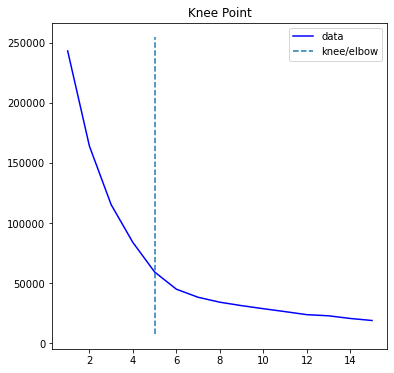

In [30]:
kne.plot_knee()

In [31]:
import sklearn.cluster as cls

In [32]:
kmean = cls.KMeans(n_clusters=kne.knee)

In [33]:
kmean

KMeans(n_clusters=5)

In [34]:
km = cls.KMeans(n_clusters=5)

In [35]:
km.fit_predict(df[['score','income']])

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [36]:
df['new_cluster'] = km.fit_predict(df[['score','income']])

In [37]:
df.head()

,gender,age,income,score,new_cluster
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


In [38]:
cn = km.cluster_centers_
cn

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783]])

In [39]:
df0 = df[df['new_cluster'] == 0]
df1 = df[df['new_cluster'] == 1]
df2 = df[df['new_cluster'] == 2]
df3 = df[df['new_cluster'] == 3]
df4 = df[df['new_cluster'] == 4]

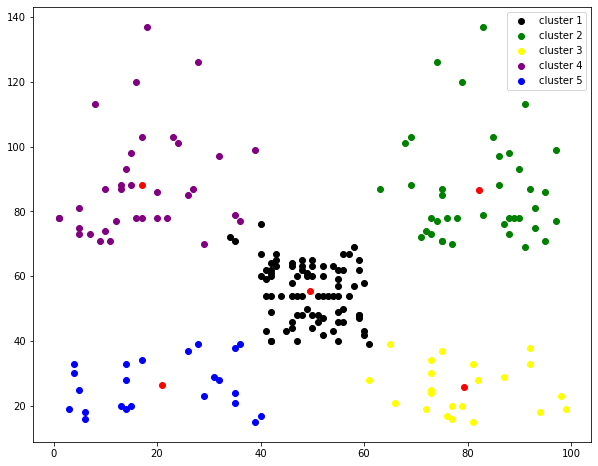

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(df0['score'], df0['income'], color='black', label='cluster 1')
plt.scatter(df1['score'], df1['income'], color='green', label='cluster 2')
plt.scatter(df2['score'], df2['income'], color='yellow', label='cluster 3')
plt.scatter(df3['score'], df3['income'], color='purple', label='cluster 4')
plt.scatter(df4['score'], df4['income'], color='blue', label='cluster 5')
plt.scatter(cn[:,0], cn[:,1], color='red')
plt.legend()

In [41]:
kmn = cls.KMeans(n_clusters=5)

In [42]:
kmn.fit_predict(test)

array([4, 2, 2, 4, 1, 1, 4, 2, 0, 1, 3, 2, 0, 4, 4, 4, 3, 0, 1, 4, 4, 2,
       2, 4, 0, 1, 2, 2, 3, 0, 4, 3, 1, 3, 1, 4, 1, 4, 4, 1], dtype=int32)

In [43]:
test['test_cluster'] = km.fit_predict(test)

In [44]:
test.head()

,gender,age,income,score,test_cluster
58,0,27,46,51,1
40,0,65,38,35,4
34,0,49,33,14,4
102,1,67,62,59,1
184,0,41,99,39,3


In [45]:
center = kmn.cluster_centers_

In [46]:
center

array([[ 0.2       , 27.        , 27.8       , 80.2       ],
       [ 0.44444444, 40.55555556, 95.55555556, 16.66666667],
       [ 0.125     , 44.625     , 29.625     , 29.75      ],
       [ 0.4       , 31.8       , 90.2       , 76.6       ],
       [ 0.38461538, 42.15384615, 54.        , 50.07692308]])

In [47]:
df0 = test[test['test_cluster'] == 0]
df1 = test[test['test_cluster'] == 1]
df2 = test[test['test_cluster'] == 2]
df3 = test[test['test_cluster'] == 3]
df4 = test[test['test_cluster'] == 4]

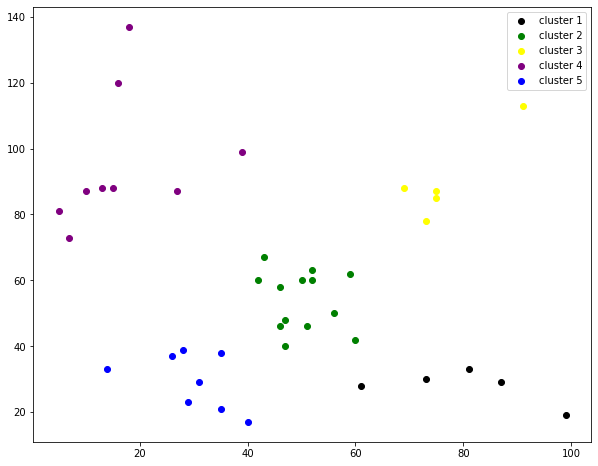

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(df0['score'], df0['income'], color='black', label='cluster 1')
plt.scatter(df1['score'], df1['income'], color='green', label='cluster 2')
plt.scatter(df2['score'], df2['income'], color='yellow', label='cluster 3')
plt.scatter(df3['score'], df3['income'], color='purple', label='cluster 4')
plt.scatter(df4['score'], df4['income'], color='blue', label='cluster 5')
plt.legend()